# Volatility, SMA, and EMA

## Calculating

* Pct change
* Log returns
* Standard deviation(Volatility)
* Rollinng
  * Simple Moving Average
  * Exponential Moving Average
  
## Standard deviation

* $\sigma_{p} = \sigma_{monthly}\times \sqrt{p}$

* $\sigma_{annually} = \sigma_{monthly}\times \sqrt{12}$

### (252 trading days per year)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data = pd.read_csv('BJ.csv', index_col=0, parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400


In [5]:
data['%-chg'] = data['Close'].pct_change()

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200,NaN
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800,0.189996
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500,-0.092203
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300,-0.172890
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400,0.054628


In [7]:
(29.5 - 24.790001)/24.790001

0.18999591811230665

In [9]:
import numpy as np

In [10]:
data['Log Returns'] = np.log(data['Close']/data['Close'].shift())

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log Returns
Date,,,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200,NaN,NaN
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800,0.189996,0.173950
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500,-0.092203,-0.096735
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300,-0.172890,-0.189818
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400,0.054628,0.053188


In [16]:
data['Close']/data['Close'].shift()

Date
2018-07-01         NaN
2018-08-01    1.189996
2018-09-01    0.907797
2018-10-01    0.827110
2018-11-01    1.054628
2018-12-01    0.948630
2019-01-01    1.187274
2019-02-01    0.962372
2019-03-01    1.082148
2019-04-01    1.034672
2019-05-01    0.881129
2019-06-01    1.056845
2019-07-01    0.892424
2019-08-01    1.114601
2019-09-01    0.985149
2019-10-01    1.032083
2019-11-01    0.887640
2019-12-01    0.959494
2020-01-01    0.902375
2020-02-01    0.938596
2020-03-01    1.322430
2020-04-01    1.032980
2020-05-01    1.368301
2020-06-01    1.035278
2020-07-01    1.074591
2020-08-01    1.108864
2020-09-01    0.935600
2020-10-01    0.921540
2020-11-01    1.070515
2020-12-01    0.909490
2021-01-01    1.128487
2021-02-01    0.955075
2021-03-01    1.116476
2021-04-01    0.995765
2021-05-01    1.002686
2021-06-01    1.062291
2021-07-01    1.064313
2021-08-01    1.118878
2021-09-01    0.969290
2021-10-01    1.064093
2021-11-01    1.131930
2021-12-01    1.012396
2022-01-01    0.917874
2022-0

In [17]:
data['Log Returns'].std()

0.09917752858705947

In [18]:
volatility = data['Log Returns'].std()*12**0.5

In [19]:
volatility

0.3435610369638035

In [20]:
str_vol = str(round(volatility, 4)*100)

In [21]:
str_vol

'34.36'

Text(0.5, 1.0, 'BJ Volatility:34.36%')

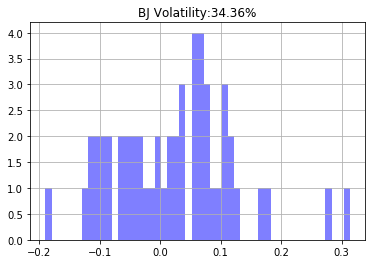

In [30]:
fig, ax = plt.subplots()
data['Log Returns'].hist(ax=ax, bins=50, alpha=0.5, color='b')
ax.set_title('BJ Volatility:' + str_vol + '%')

In [31]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log Returns
Date,,,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200,NaN,NaN
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800,0.189996,0.173950
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500,-0.092203,-0.096735
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300,-0.172890,-0.189818
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400,0.054628,0.053188


In [33]:
data['Close'].rolling(2).mean().head()

Date
2018-07-01          NaN
2018-08-01    27.145001
2018-09-01    28.140000
2018-10-01    24.465001
2018-11-01    22.755001
Name: Close, dtype: float64

In [37]:
data['MA2'] = data['Close'].rolling(2).mean()

In [53]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log Returns,MA2,EMA2
Date,,,,,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200,NaN,NaN,NaN,24.790001
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800,0.189996,0.173950,27.145001,27.930000
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500,-0.092203,-0.096735,28.140000,27.163334
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300,-0.172890,-0.189818,24.465001,23.821111
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400,0.054628,0.053188,22.755001,23.513704


In [42]:
data['EMA2'] = data['Close'].ewm(span=2, adjust=False).mean()

In [43]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log Returns,MA2,EMA2
Date,,,,,,,,,,
2018-07-01,23.209999,27.459999,22.879999,24.790001,24.790001,25833200,NaN,NaN,NaN,24.790001
2018-08-01,24.750000,31.580000,24.299999,29.500000,29.500000,22695800,0.189996,0.173950,27.145001,27.930000
2018-09-01,29.500000,32.919998,25.799999,26.780001,26.780001,48341500,-0.092203,-0.096735,28.140000,27.163334
2018-10-01,26.900000,27.670000,20.330000,22.150000,22.150000,42620300,-0.172890,-0.189818,24.465001,23.821111
2018-11-01,22.379999,24.830000,19.309999,23.360001,23.360001,37619400,0.054628,0.053188,22.755001,23.513704


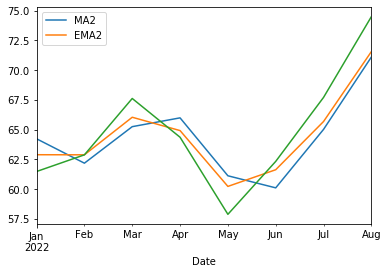

In [52]:
fig, ax = plt.subplots()
data[['MA2', 'EMA2']].loc['2022-01-01':'2022-08-01'].plot(ax=ax)
data['Close'].loc['2022-01-01':'2022-08-01'].plot(ax=ax)